In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
sns.set(style='white', rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings('ignore')

In [44]:
from google.colab import files
 
 
uploaded = files.upload()

Saving CovidDeaths.csv to CovidDeaths.csv


In [45]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['CovidDeaths.csv']))
print(df)

      iso_code continent     location        date  population  total_cases  \
0          AFG      Asia  Afghanistan  24/02/2020  38928341.0          1.0   
1          AFG      Asia  Afghanistan  25/02/2020  38928341.0          1.0   
2          AFG      Asia  Afghanistan  26/02/2020  38928341.0          1.0   
3          AFG      Asia  Afghanistan  27/02/2020  38928341.0          1.0   
4          AFG      Asia  Afghanistan  28/02/2020  38928341.0          1.0   
...        ...       ...          ...         ...         ...          ...   
89675      ZWE    Africa     Zimbabwe  14/05/2021  14862927.0      38535.0   
89676      ZWE    Africa     Zimbabwe  15/05/2021  14862927.0      38554.0   
89677      ZWE    Africa     Zimbabwe  16/05/2021  14862927.0      38560.0   
89678      ZWE    Africa     Zimbabwe  17/05/2021  14862927.0      38572.0   
89679      ZWE    Africa     Zimbabwe  18/05/2021  14862927.0      38595.0   

       new_cases  new_cases_smoothed  total_deaths  new_deaths 

In [46]:
df.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,24/02/2020,38928341.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,38928341.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
Afganistan = sum((df['iso_code']=="AFG") & (df['continent']=="Asia") & (df['location']=='Afghanistan'))
Afganistan

450

In [76]:
Nepal = sum((df['iso_code']=="NPL") & (df['continent']=="Asia") & (df['location']=='Nepal'))
Nepal

480

In [52]:
Africa = sum((df['iso_code']=="DZA") & (df['continent']=="Africa") & (df['location']=='Algeria'))
Africa

449

In [77]:
Macao = sum((df['iso_code']=="MAC") & (df['continent']=="Asia") & (df['location']=='Macao'))
Macao

100

In [78]:
Kuwait = sum((df['iso_code']=="KWT") & (df['continent']=="Asia") & (df['location']=='Kuwait'))
Kuwait

450

In [81]:
Georgia = sum((df['iso_code']=="GEO") & (df['continent']=="Asia") & (df['location']=='Georgia'))
Georgia

448

In [61]:
Europe = sum((df['iso_code']=="ALB") & (df['continent']=="Europe") & (df['location']=='Albania'))
Europe

449

In [54]:
South_America = sum((df['iso_code']=="ARG") & (df['continent']=="South America") & (df['location']=='Argentina'))
South_America

504

In [87]:
df2 = pd.DataFrame([[South_America,Afganistan,Africa,Europe],[Georgia,Kuwait,Macao,Nepal]],columns=['South_America','Afganistan','Africa','Europe'],index=['Covid','Non_Covid'])
df2

,South_America,Afganistan,Africa,Europe
Covid,504,450,449,449
Non_Covid,448,450,100,480


ValueError: ignored

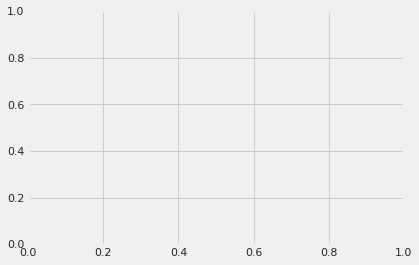

In [86]:
x = np.arange(5)
y1 = [South_America,Afganistan,Africa,Europe]
y2 = [Georgia,Kuwait,Macao,Nepal]
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['Paid', 'Rejected', 'Closed', 'Outstanding'])
plt.xlabel("Status")
plt.ylabel("Covid_Non_Covid")
plt.legend(["Covid", "Non_Covid"])
plt.show()

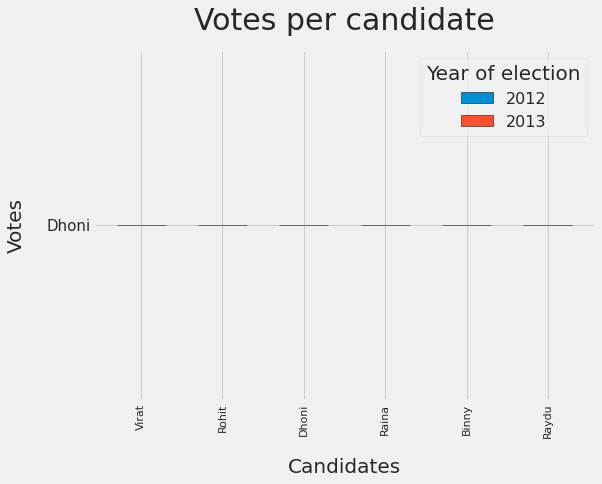

In [43]:
#use fivethirty eights style of plots
plt.style.use("fivethirtyeight")
#create the base axis to add the bars to
fig, ax = plt.subplots(1,1, figsize = (8,6))
#extract the labels
label = ['South_America','Afganistan','Africa','Europe']
#use this to create x ticks to add the data to
x = np.arange(len(label))
#set a width for each bar 
width = 0.3
#create out first bar
#set it so that x will be the centre of the bars
#so that we can add our labels later
#so set the centre of the first to be 1/2 width away
#to the left
rect1 = ax.bar(x - width/2,
              df2[Covid],
              width = width, 
               label = South_America,
               edgecolor = "black"
              )
#create the second bar
#with a centre half a width to the right
rect2 = ax.bar(x + width/2,
              df2[Non_Covid],
              width = width,
              label = 2013,
              edgecolor = "black")
#add the labels to the axis
ax.set_ylabel("Votes",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Candidates",
             fontsize = 20,
             labelpad =20)
ax.set_title("Votes per candidate",
            fontsize = 30,
            pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legend
#using the labels of the bars
ax.legend(title = "Year of election",
         fontsize = 16,
         title_fontsize = 20)
#adjust the tick paramaters
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

Text(0.5, 1.0, 'Covid_Non_Covid Status')

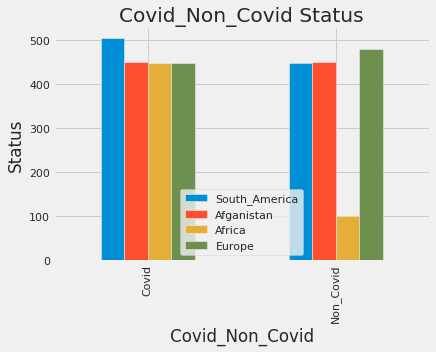

In [92]:
df2.plot(kind='bar')
plt.xlabel('Covid_Non_Covid')
plt.ylabel('Status')
plt.title('Covid_Non_Covid Status')